In [56]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [16]:
data = pd.read_csv(r'C:\Users\mbauer2\workspace\Uni\enterprise-ai-project\ImmmoWelt_Price_Guide\flats_to_buy_preproceesed.csv')

In [17]:
data

,Url,Title,Object_price,Object_currency,LivingSpace,Rooms,ConstructionYear,ZipCode,EstateTypeGerman,DistributionTypeGerman,...,teppich,terrasse,tiefgarage,vermietet,vollerschlossen,wanne,wasch_trockenraum,wg_geeignet,wintergarten,zentralheizung
0,https://www.immowelt.de/expose/2ar9w55,Ried 67.5 - OPTIMAL,536000.0,EUR,99.34,4.0,NaN,97230,WOHNUNG,ZUM_KAUF,...,0,1,0,0,0,0,0,0,0,0
1,https://www.immowelt.de/expose/2aaaw55,Ried 67.6 - PASSEND,556000.0,EUR,101.21,4.0,NaN,97230,WOHNUNG,ZUM_KAUF,...,0,1,0,0,0,0,0,0,0,0
2,https://www.immowelt.de/expose/2agdg5f,++2- Zi. ETW mit ca. 53m\u00b2 in W\u00fcrzbur...,220000.0,EUR,53.00,2.0,1971.0,97080,WOHNUNG,ZUM_KAUF,...,0,0,0,0,0,1,0,0,0,1
3,https://www.immowelt.de/expose/2ak8w55,Ried 67.1 - IDEAL,645000.0,EUR,117.96,4.0,NaN,97230,WOHNUNG,ZUM_KAUF,...,0,1,0,0,0,0,0,0,0,0
4,https://www.immowelt.de/expose/27zeu5l,"Sehr gepflegte 3Zi-ETW N\u00e4he Uni-Klinik, g...",269000.0,EUR,70.00,3.0,1968.0,97078,WOHNUNG,ZUM_KAUF,...,0,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,https://www.immowelt.de/expose/2a42q5g,Helle sch\u00f6ne gut geschnittene 75qm ETW Be...,289000.0,EUR,75.00,3.0,2010.0,97084,WOHNUNG,ZUM_KAUF,...,0,0,0,0,0,0,0,0,0,0
283,https://www.immowelt.de/expose/2as2559,"Eigentumswohnung, ca. 76 qm, direkt vom Herste...",541039.0,EUR,76.00,3.0,NaN,97276,WOHNUNG,ZUM_KAUF,...,0,1,0,0,0,0,0,0,0,0
284,https://www.immowelt.de/expose/28bd354,Fern von Stress und Hektik,310000.0,EUR,87.00,4.0,NaN,97084,WOHNUNG,ZUM_KAUF,...,0,0,0,0,0,0,0,0,0,1
285,https://www.immowelt.de/expose/2a76559,"Eigentumswohnung, ca. 66 qm, direkt vom Herste...",474635.0,EUR,66.00,3.0,NaN,97276,WOHNUNG,ZUM_KAUF,...,0,1,0,0,0,0,0,0,0,0


In [18]:
data['ConstructionYear'].isnull().sum()
print(data.isnull().sum())

Url                  0
Title                0
Object_price         8
Object_currency      8
LivingSpace          1
                    ..
wanne                0
wasch_trockenraum    0
wg_geeignet          0
wintergarten         0
zentralheizung       0
Length: 94, dtype: int64


In [19]:
data.dropna(subset=['ConstructionYear'], inplace=True)
data.dropna(subset=['Object_price'], inplace=True)
data.dropna(subset=['Rooms'], inplace=True)
data.drop('Title', axis=1, inplace=True)
data.drop('Object_currency', axis=1, inplace=True)
data.drop('Url', axis=1, inplace=True)
data.drop('EstateType', axis=1, inplace=True)
data.drop('DistributionType', axis=1, inplace=True)
data['ZipCode']= data['ZipCode'].astype(str)
data = data.reindex()

In [20]:
data

,Object_price,LivingSpace,Rooms,ConstructionYear,ZipCode,EstateTypeGerman,DistributionTypeGerman,abstellraum,als_ferienimmobilie_geeignet,altbau_(bis_1945),...,teppich,terrasse,tiefgarage,vermietet,vollerschlossen,wanne,wasch_trockenraum,wg_geeignet,wintergarten,zentralheizung
2,220000.0,53.00,2.0,1971.0,97080,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,269000.0,70.00,3.0,1968.0,97078,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,1,1,0,1,0,1,0,1
5,169000.0,33.51,1.0,1983.0,97072,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,275000.0,65.45,2.0,1958.0,97072,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,239000.0,79.50,3.0,1977.0,97209,WOHNUNG,ZUM_KAUF,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,349000.0,71.23,2.0,2019.0,97209,WOHNUNG,ZUM_KAUF,0,0,0,...,0,1,0,0,0,0,0,0,0,0
279,95500.0,31.10,1.0,1997.0,97299,WOHNUNG,ZUM_KAUF,1,0,0,...,0,0,0,0,0,0,0,0,0,1
281,240000.0,97.22,4.0,1991.0,97228,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,1,0,1,0,0,0,1
282,289000.0,75.00,3.0,2010.0,97084,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(data.isnull().sum())

Object_price         0
LivingSpace          0
Rooms                0
ConstructionYear     0
ZipCode              0
                    ..
wanne                0
wasch_trockenraum    0
wg_geeignet          0
wintergarten         0
zentralheizung       0
Length: 89, dtype: int64


In [22]:
data = data.reset_index(drop=True)

In [23]:
data

,Object_price,LivingSpace,Rooms,ConstructionYear,ZipCode,EstateTypeGerman,DistributionTypeGerman,abstellraum,als_ferienimmobilie_geeignet,altbau_(bis_1945),...,teppich,terrasse,tiefgarage,vermietet,vollerschlossen,wanne,wasch_trockenraum,wg_geeignet,wintergarten,zentralheizung
0,220000.0,53.00,2.0,1971.0,97080,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,269000.0,70.00,3.0,1968.0,97078,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,1,1,0,1,0,1,0,1
2,169000.0,33.51,1.0,1983.0,97072,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,275000.0,65.45,2.0,1958.0,97072,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,239000.0,79.50,3.0,1977.0,97209,WOHNUNG,ZUM_KAUF,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,349000.0,71.23,2.0,2019.0,97209,WOHNUNG,ZUM_KAUF,0,0,0,...,0,1,0,0,0,0,0,0,0,0
250,95500.0,31.10,1.0,1997.0,97299,WOHNUNG,ZUM_KAUF,1,0,0,...,0,0,0,0,0,0,0,0,0,1
251,240000.0,97.22,4.0,1991.0,97228,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,1,0,1,0,0,0,1
252,289000.0,75.00,3.0,2010.0,97084,WOHNUNG,ZUM_KAUF,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y = data['Object_price']
X = data.drop('Object_price', axis=1)
print(y.head())
print(X.head())

0    220000.0
1    269000.0
2    169000.0
3    275000.0
4    239000.0
Name: Object_price, dtype: float64
   LivingSpace  Rooms  ConstructionYear ZipCode EstateTypeGerman  \
0        53.00    2.0            1971.0   97080          WOHNUNG   
1        70.00    3.0            1968.0   97078          WOHNUNG   
2        33.51    1.0            1983.0   97072          WOHNUNG   
3        65.45    2.0            1958.0   97072          WOHNUNG   
4        79.50    3.0            1977.0   97209          WOHNUNG   

  DistributionTypeGerman  abstellraum  als_ferienimmobilie_geeignet  \
0               ZUM_KAUF            0                             0   
1               ZUM_KAUF            0                             0   
2               ZUM_KAUF            0                             0   
3               ZUM_KAUF            0                             0   
4               ZUM_KAUF            1                             0   

   altbau_(bis_1945)  bad/wc_getrennt  ...  teppich  terras

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                  train_size=0.8, 
                                                  random_state = 0)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, 
                                                  train_size=0.8, 
                                                  random_state = 0)

In [26]:
num_cols = [col for col in train_X.columns if train_X[col].dtype == 'float64']
cat_cols = [col for col in train_X.columns if train_X[col].dtype == 'object']
bin_cols = [col for col in train_X.columns if train_X[col].dtype == 'int64']


In [27]:
print(cat_cols)

['ZipCode', 'EstateTypeGerman', 'DistributionTypeGerman']


In [31]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_xgb = encoder.fit_transform(train_X[cat_cols]).toarray()
X_valid_categorical_xgb = encoder.transform(val_X[cat_cols]).toarray()
X_test_categorical_xgb = encoder.transform(test_X[cat_cols]).toarray()
X_train_processed = np.concatenate([train_X[num_cols], X_train_categorical_xgb], axis=1)
X_valid_processed = np.concatenate([val_X[num_cols], X_valid_categorical_xgb], axis=1)
X_test_processed = np.concatenate([test_X[num_cols], X_test_categorical_xgb], axis=1)
X_train_processed = np.concatenate([train_X[bin_cols], X_train_processed], axis=1)
X_valid_processed = np.concatenate([val_X[bin_cols], X_valid_processed], axis=1)
X_test_processed = np.concatenate([test_X[bin_cols], X_test_processed], axis=1)

In [32]:
X_train_processed[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [50]:
model = xgb.XGBRegressor(eval_metric=['rmse', 'mae'], early_stopping_rounds=30)
model.fit(X=X_train_processed, 
          y=train_y,
          eval_set=[(X_valid_processed, val_y)],  # Liste mit Validierungsdaten und Zielvariablen
          verbose=True
)

preds= model.predict(X_test_processed)
score = mean_absolute_error(test_y, preds)

print("MAE: {}".format(score))

[0]	validation_0-rmse:377643.68046	validation_0-mae:262610.76982
[1]	validation_0-rmse:318088.85099	validation_0-mae:202409.38262
[2]	validation_0-rmse:275462.16907	validation_0-mae:160332.12195
[3]	validation_0-rmse:257406.44672	validation_0-mae:135367.97066
[4]	validation_0-rmse:238840.56188	validation_0-mae:116458.24981
[5]	validation_0-rmse:229247.11708	validation_0-mae:105102.08289
[6]	validation_0-rmse:220891.60537	validation_0-mae:96105.88834
[7]	validation_0-rmse:215580.06125	validation_0-mae:91740.50419
[8]	validation_0-rmse:210797.10416	validation_0-mae:87958.25381
[9]	validation_0-rmse:208237.48691	validation_0-mae:85648.82298
[10]	validation_0-rmse:205501.68549	validation_0-mae:83800.86528
[11]	validation_0-rmse:203666.05547	validation_0-mae:82480.14653
[12]	validation_0-rmse:202932.15426	validation_0-mae:81593.57965
[13]	validation_0-rmse:202372.73070	validation_0-mae:81275.66845
[14]	validation_0-rmse:201999.99721	validation_0-mae:80689.00381
[15]	validation_0-rmse:200560

In [54]:
model2 = lgb.LGBMRegressor(metric=['rmse', 'mae'], early_stopping_rounds=30)
model2.fit(X=X_train_processed, 
          y=train_y,
          eval_set=[(X_valid_processed, val_y)],  # Liste mit Validierungsdaten und Zielvariablen
          verbose=True
)

preds= model2.predict(X_test_processed)
score = mean_absolute_error(test_y, preds)

print("MAE: {}".format(score))


[1]	valid_0's rmse: 288797	valid_0's l1: 156803
[2]	valid_0's rmse: 282054	valid_0's l1: 149608
[3]	valid_0's rmse: 274276	valid_0's l1: 143304
[4]	valid_0's rmse: 269147	valid_0's l1: 137621
[5]	valid_0's rmse: 263903	valid_0's l1: 132659
[6]	valid_0's rmse: 258331	valid_0's l1: 128318
[7]	valid_0's rmse: 254096	valid_0's l1: 124107
[8]	valid_0's rmse: 249462	valid_0's l1: 120687
[9]	valid_0's rmse: 245479	valid_0's l1: 117653
[10]	valid_0's rmse: 242274	valid_0's l1: 114766
[11]	valid_0's rmse: 238984	valid_0's l1: 112429
[12]	valid_0's rmse: 236908	valid_0's l1: 110240
[13]	valid_0's rmse: 233968	valid_0's l1: 108005
[14]	valid_0's rmse: 231644	valid_0's l1: 105629
[15]	valid_0's rmse: 229900	valid_0's l1: 103637
[16]	valid_0's rmse: 227568	valid_0's l1: 102207
[17]	valid_0's rmse: 225425	valid_0's l1: 100816
[18]	valid_0's rmse: 224089	valid_0's l1: 99729.6
[19]	valid_0's rmse: 222369	valid_0's l1: 98922.9
[20]	valid_0's rmse: 220765	valid_0's l1: 97593.7
[21]	valid_0's rmse: 21922

c:\Python311\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [57]:
n_estimators = [10, 50, 100, 200, 300, 400, 500]
train_maes = []
valid_maes = []
for n in n_estimators:
    
    rf_model = RandomForestRegressor(n_estimators=n, random_state=0)
    rf_model.fit(X_train_processed, train_y)

    
    preds_train_rf = rf_model.predict(X_train_processed)
    preds_valid_rf = rf_model.predict(X_valid_processed)

    
    train_mae = mean_absolute_error(train_y, preds_train_rf)
    valid_mae = mean_absolute_error(val_y, preds_valid_rf)

    
    train_maes.append(train_mae)
    valid_maes.append(valid_mae)

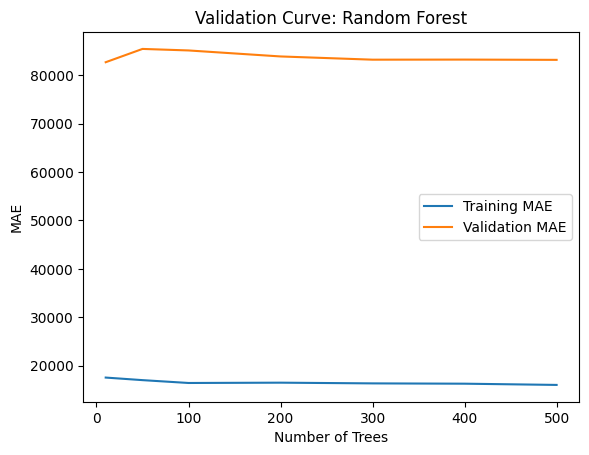

In [59]:
plt.plot(n_estimators, train_maes, label='Training MAE')
plt.plot(n_estimators, valid_maes, label='Validation MAE')
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation Curve: Random Forest')
plt.show()

In [61]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=0)
rf_model.fit(X_train_processed, train_y)
preds_test_rf = rf_model.predict(X_test_processed)
score = mean_absolute_error(test_y, preds_test_rf)
print("MAE: {}".format(score))

MAE: 34749.76091503268
